__EDA__ involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

As we noticed in the `Data_Wrangling` notebook, the data is pretty much clean with no NaN observations.

## Import libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# sns.set(rc={"figure.dpi":300})
# plt.rcParams["figure.dpi"] = 300


## Read data

In [2]:
# Importing train and test subsets
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
# Take a look at the data
train.sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
124635,9aba5f3cb9cadc2e,Thank you for experimenting with the page Univ...,0,0,0,0,0,0
90893,f3284d7061f6ebb4,THE USER BIGDUNC IS A LOOBTARD,1,0,0,0,0,0
28296,4aeb574b5d831a65,"Hup, make that three editors. Hammond take you...",0,0,0,0,0,0
87691,ea9156e90303a0ca,"Sorry WilyD, but these nicknames are racist an...",0,0,0,0,0,0
143824,033124dddb5898ca,"Biggus Dickus \nBlow me, Senor Freebie. FOX N...",1,0,1,0,1,0


The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


## Data analysis

In [5]:
# print total observations in train and test subsets
print("Train: {}".format(train.shape))
print("Test:  {}".format(test.shape))

Train: (159571, 8)
Test:  (153164, 2)


In [6]:
# Copy dataframe for manipulation
X = train.copy()

# Check for clean comments
X["tags"] = np.sum(X.iloc[:, 2:], axis=1)
print(X["tags"].sample(10))
X["is_clean"] = X["tags"].apply(lambda x : 1 if x == 0 else 0)

63828     0
16906     0
86756     0
140202    0
92297     0
94920     0
112754    0
109786    0
113285    2
42179     0
Name: tags, dtype: int64


We can notice that there are multiple cases where a comment has more than one label.

In [7]:
total_comm = X.shape[0]
total_clean_comm = X["is_clean"].sum()
total_not_clean_comm = total_comm - total_clean_comm

print("Total comments: {}".format(total_comm))
print("Total clean comments: {}".format(total_clean_comm))
print("Total not clean comments: {}".format(total_not_clean_comm))

Total comments: 159571
Total clean comments: 143346
Total not clean comments: 16225


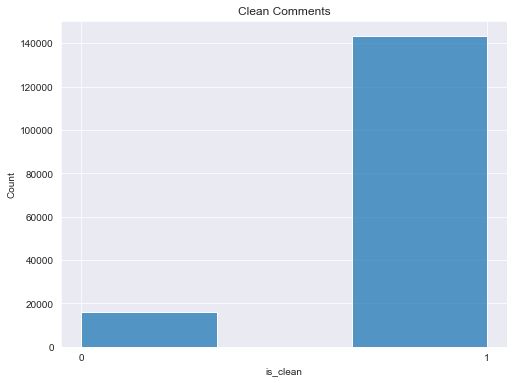

In [8]:
# Visualization of comments
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(X["is_clean"], bins=3)
ax.set_xticks([0, 1])
ax.set_title("Clean Comments")
plt.show()

In [9]:
comment_types = X.iloc[:, 2:-2].sum()
print(comment_types)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


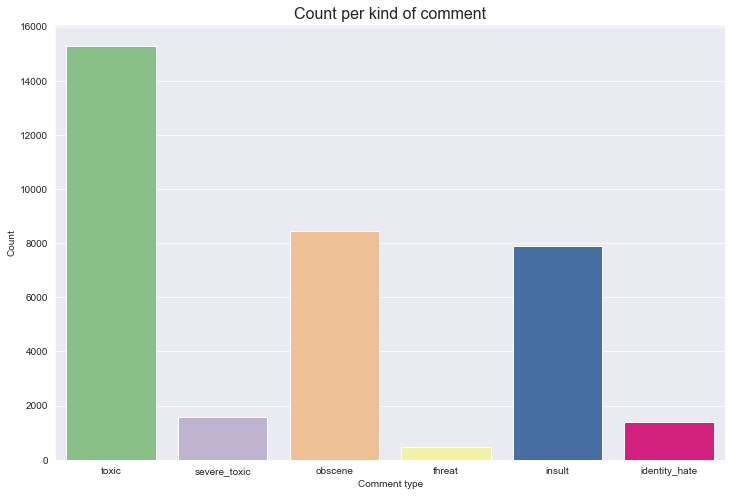

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=comment_types.index,
    y=comment_types.values,
    palette="Accent"
)
ax.set_title("Count per kind of comment", fontsize=16)
ax.set_xlabel("Comment type")
ax.set_ylabel("Count")
plt.show()

As from the above graph, we notice that the different types of comments are not normally distributed, so we might face a class imbalance problem.

Let's check how many coments have multiple tags

In [11]:
count_tags = X["tags"].value_counts()
print(count_tags)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: tags, dtype: int64


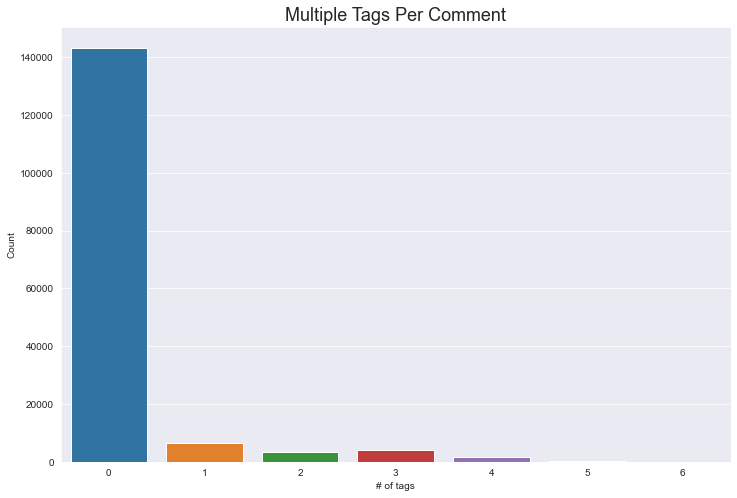

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=count_tags.index,
    y=count_tags.values
)
ax.set_title("multiple tags per comment".title(),
            fontsize=18)
ax.set_xlabel("# of tags")
ax.set_ylabel("Count")
plt.show()

## Relationship between features